<table>
    <tr>
        <td style="text-align:left">
            <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9ItLTT_F-3Q30cu7ZCCoKmuFGBt22pe7pNA" alt="Logo Universidad" width="300"/>
        </td>
        <td>
             Departamento de Ciencias de la Computación y de la Decisión<br>
            Facultad de Minas<br>
            Universidad Nacional de Colombia<br>
            Optimizacion e IA 2024-2S<br><br>
            Docente: Maria Constanza Torres Madronero<br>
            <br>
            Contribuciones a la guia por: <br>
            - Deimer Miranda Montoya (2023)<br>
            - Luis Fernando Becerra Monsalve (2024)
        </td>    
    </tr>
</table>

# **Clasificacion supervisada**

## <span style = 'color: red'>A.</span> Preparación de los datos



Scikit-learn, también conocida como sklearn, es una librería gratuita de aprendizaje de máquina para Python. Desarrollada inicialmente por David Cournapeau en Google Summer en 2007. Incluye diferentes métodos de clasificación, regresión, y clustering incluyendo máquinas de soporte vectorial (SVM), bosques aleatorios (RF), K-means y DBSCAN.  

Toda la documentación sobre esta librería puede ser consultada en el siguiente [aquí.](https://scikit-learn.org/stable/ )

In [1]:
#La libreria scikit-learn - incluida en colab - incluye
#varios datasets para aprender a usar diferentes algoritmos de aprendizaje
#de maquinas. Vamos a usar en esta clase el dataset Iris
from sklearn import datasets
#Iris: incluye 150 muestras (50 por clase) con 4 atributos
#Los datos incluidos en sklearn ya se encuentran organizados y limpios
iris = datasets.load_iris()

In [2]:
#Las clases incluidas en Iris corresponden a tres tipos de lirios
print(iris.target_names)

#Las caracteristicas estan asociadas al largo y ancho de los petalos y el
#sépalo
print(iris.feature_names)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
#Vamos a revisar los primeros 5 elementos del conjunto de datos
print(iris.data[0:5])

#y revisemos las etiquetas (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Para la manipulación de los datos vamos a emplear los DataFrames de Pandas.
Pandas es una de las principales librerías de Python. Las estructuras más utilizadas en esta librería son las Series y los DataFrames. Las Series son objetos unidimensionales y los DataFrames son paneles bidimensionales compuestos por filas y columnas. El formato de los DataFrames puede compararse con los diccionarios de Python: las claves son los nombres de las columnas y los valores son las Series. Su estructura puede considerarse similar a la de una hoja de cálculo de Excel.

Mayor información sobre la librería Pandas y uso de los DataFrame puede encontrarse en el libro de referencia del curso.


In [5]:
# Primero, importamos la librería
import pandas as pd

# Organizamos los datos en un DataFrame
data = pd.DataFrame(
    {
        'sepal length': iris.data[:, 0],
        'sepal width':  iris.data[:, 1],
        'petal length': iris.data[:, 2],
        'petal width':  iris.data[:, 3],
        'species':      iris.target
    }
)

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Se va a emplear el método `train_test_split` de `sklearn` para hacer la separación de los datos en un par de conjuntos de entrenamiento y validación de manera aleatoria. Es importante tener en cuenta que para ello se usan números *pseudoaleatorios*, por lo que vale la pena seleccionar una *semilla* (*seed* en inglés) para asegurar la repitibilidad de los datos.

In [ ]:
# Vamos a dividir los datos entre las muestras de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Muestras
X = data[['sepal length', 'sepal width', 'petal length', 'petal width', ]]

# Etiquetas
y = data['species']

# Seleccionamos 70% de muestras para entrenamiento y 30% para prueba
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=2342, )

## <span style = 'color: red'>B.</span> Bosques aleatorios

***Random forest*** (bosque aleatorio) es un algoritmo de aprendizaje de máquina, introducido por Leo Breiman y Adele Cutler, que combina los resultados de varios árboles de decisión para llegar a un único resultado.

*   Para conocer más sobre arboles de decisión visita https://www.ibm.com/topics/decision-trees
*   En este enlace mayor documentación sobre Random ForestÑ https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm



In [8]:
# Importamos el modelo de bosques aleatorios para su entrenamiento
from sklearn.ensemble import RandomForestClassifier

# Entrenamos el modelo con parametros fijos
RFclas = RandomForestClassifier(
    n_estimators=10,
    criterion='entropy',
    max_depth=2,
    random_state=0,
)
RFclas.fit(X_tr, y_tr)

# Una vez entrenado el modelo, lo aplicamos a los datos de prueba
y_pred = RFclas.predict(X_ts)

In [9]:
#Vamos a calcular las metricas de precision para evaluar el desempeño del clasificador
from sklearn.metrics import accuracy_score
#Por ejemplo, la precisión se calcula a partir del numero total de muestras
#correctamente clasificadas sobre el numero total de muestras

print('Accuracy: ', accuracy_score(y_ts, y_pred))


Accuracy:  0.9111111111111111


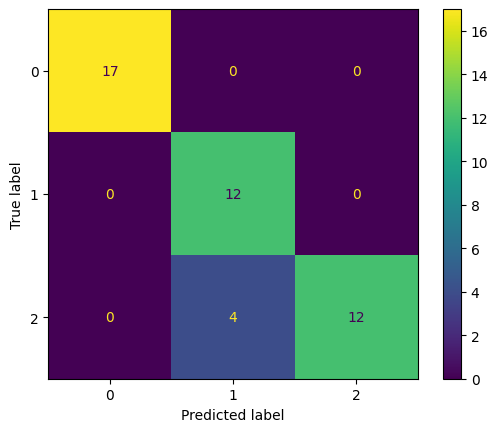

In [10]:
# Podemos tambien analizar la matriz de confusión
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
cm = confusion_matrix(y_ts, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=RFclas.classes_,
)
disp.plot() 


In [18]:
# Podemos visualizar los árboles de decisión entrenados en el proceso

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

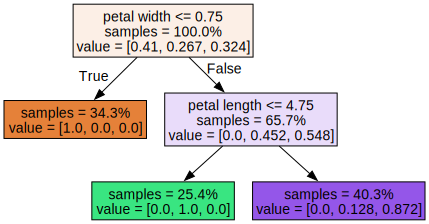

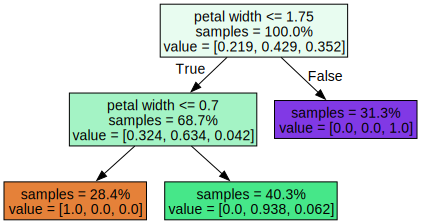

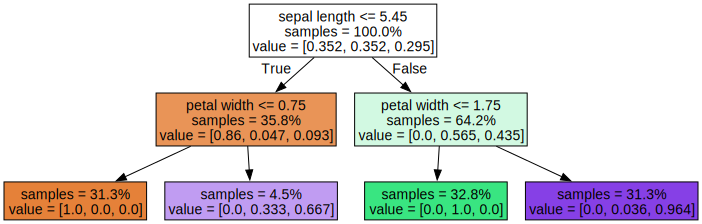

In [23]:
for i in range(3):
    tree = RFclas.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_tr.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True,)
    graph = graphviz.Source(dot_data)
    display(graph)

## <span style = 'color:red'>C.</span> Parametros de Random Forest  
1. Parámetros de la bolsa (Bagging)

*   n_estimators: Numero de árboles de decisión
*   boostrap: uso de muestras con o sin remplazo
*   criterion: evaluación de la división del nodo

2. parámetros de los arboles

*   max_features: máximo número de características que pueden ser referenciadas en un partición
*   max_depth: máxima profundidad del árbol de decisión
*   min_samples_split: mínimo número de muestras para la subdivisión de un nodo




In [22]:
#Veamos que ocurre, si cambiamos alguno de los parametros del modelo

#Entrenamos
RFclas2 = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=2,
    random_state=0,
)
RFclas2.fit(X_tr, y_tr)

#Aplicamos el modelo
y_pred2 = RFclas.predict(X_ts)

#Analizamos la precision:
print('Accuracy:', accuracy_score(y_ts, y_pred2))

Accuracy: 0.9111111111111111


### <span style = 'color: red'>D.</span> Selección de características importantes
Una de las herramientas de proporciona Random Forest es la medida de la importancia de las características. Es decir, que además de proporcionarnos un modelo de clasificación, es un selector de características. La importancia se determina por la frecuencia que una característica es seleccionada para la construcción de un árbol de decisión.

In [24]:
#La informacion sobre la importancia de cada caracteristica se encuentra en el atributo
#feature_importances_ del modelo.
#Lo organizamos en una Serie para su visualizacion
feature_imp = pd.Series(
    RFclas2.feature_importances_,
    index=iris.feature_names,
    ).sort_values(
        ascending=False
    )
feature_imp

petal width (cm)     0.467968
petal length (cm)    0.405951
sepal length (cm)    0.114339
sepal width (cm)     0.011741
dtype: float64

In [ ]:
#Tambien podemos graficarlo


#Este tipo de analisis permite decidir si queremos continuar con todo el conjunto
#de caracteristicas, o seleccionar solo las mas importantes
#Reducir el espacio de representacion permite reducir los costos computacionales






In [25]:
#Entrenamiento de un modelo usando solo las caracteristicas mas relevantes
#Seleccionamos el conjunto de caracteristicas
X = data[['petal width', 'petal length', 'sepal length']]
y = data['species']

#Dividimos de nuevo el conjunto de datos
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [27]:
#Entrenamos el clasificador
RFclas3 = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=5, random_state=0)
RFclas3.fit(X_train,y_train)
#Clasificamos
y_pred = RFclas3.predict(X_test)
#Calculamos la precision
print("Accuracy: ", accuracy_score(y_test,y_pred))


Accuracy:  0.9777777777777777


In [30]:
#Que ocurre si solo usamos dos caracteristicas?



#### Anotaciones importantes
1. Para el uso de Random Forest tenemos varios elementos que debemos definir de nuestro modelo
2. Por un lado, tenemos que seleccionar el número de características de los datos con las que queremos trabajar. Una forma de hacerlo es, entrenando un modelo inicial de RF y usar la importancia de las características calculada por el algoritmo para solo quedarnos con las mas relevantes. Otra alternativa es aplicar otros métodos de selección de características.
3. Por otro lado, debemos definir los hiperparámetros del clasificador. En la literatura, se encuentran muchos resultados que ofrecen una idea de que valores utilizar con datasets como Iris. Sin embargo, para casos reales es necesario realizar una selección adecuada de los hiperparámetros.
